# Social Network Analysis in Python Lecture

June 2021

Pu Yan, Oxford Internet Institute, University of Oxford 

Email: <pu.yan@oii.ox.ac.uk> or <thuyanpu@gmail.com>

## Outline of the course

0. Introduction

    0.1 Defining networks
    
    0.2 Social network examples
    
1. Understanding networks: Key network concepts 

2. Nework 101: Data management
    
    2.1 Tookit for SNA in Python
    
    2.2 Basic network generation in NetworkX
    
    2.3 Importing real-world SNA datase
    
    2.4 Importing large-scale social network data

3. Visualising networks
    
    3.1 Option 1: the NetworkX method
    
    3.2 Option 2: ploting interactive networks using pyvis

4. Measuring networks: Centrality

    4.1 Degree centrality
    
    4.2 Betweenness centrality 
    
    4.3 Eigenvector centrality


5. Identifying subgroups: Community detection 

    5.1 Connected components
    
    5.2 Modularity
    
    5.3 Cliques
   
6. Conclusion

## Useful resources

- Books:

    - Leguina, Adrian. (2016). Analysing social networks. International Journal Of Research & Method In Education: IJRME, 39(4), Pp446-447. 
    
    - M., K., Mohan, A., & Srinivasa, K. (2018). Practical social network analysis with Python (Computer communications and networks). Cham, Switzerland.
    
    - Al-Taie, M., & Kadry, S. (2017). Python for graph and network analysis (Advanced information and knowledge processing). Cham, Switzerland.    

- Online resources:
    
    - Exploring and Analyzing Network Data with Python: https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python
    
    - Introduction to Social Network Analysis using Gephi: https://towardsdatascience.com/how-to-get-started-with-social-network-analysis-6d527685d374 
    
    - A curated list of network analysis resources (including examples from different disciplines): https://github.com/briatte/awesome-network-analysis

## 0. Introduction

### 0.1 Defining networks

> A network is a set of links (ties or edges) and objects (nodes or vertices). 

> A generic hypothesis of network theory is that an actor's *position in a network* determines in part the *constraints* and *opportunities* that he or she will encounter, and therefore identifying that position is important for predicting actor outcomes such as performance, behavior or beliefs (Borgatti, Everett & Johnson, 2013)

- Biological network: brain or neural network

- Transportation network: flight routes network <https://www.igismap.com/flight-routes-network-analysis/>

- Computer network 

### 0.2 Social network examples: 

- Literature: networks of fictional characters:

Source: http://evelinag.com/blog/2016/01-25-social-network-force-awakens/index.html

![Star war social network](img/star_war.png)

- History: networks of historical figures:

Source: http://sixdegreesoffrancisbacon.com/?ids=10000473&min_confidence=60&type=network 

- Culture: networks of cultural concepts:

Yan & Yaseri, 2017

![Semantic network](img/semantic_network.png)

- Political science

![US Political Blogs](img/us_political_blogs.png)

- Item recomendation system via vipartite network 

![Recommendation system](img/recommendation.png)

## 1. Understanding networks: Key network concepts  

### The network "language"

- A graph is a mathematical object that describes relationships between items. It consists of nodes that represent objects and edges that relate one node to another. 

- **Vertex**: A vertex is simply drawn as a node or a dot.

- **Edge**: An edge (a set of two elements) is drawn as a line connecting two vertices

    - **Undirected networks**: A network is undirected if every edge is bidirectional/symmetrical/reciprocal. 
    
        - Examples: coauthorship; partnership; friendship
        
    - **Directed networks**: A network is directed if every edge is directional/asymmetrical/non-reciprocal.
    
        - Examples: followings on social media; 
                
    - **Weight**: A weighted network has a label (weight) with every edge in the graph. Weights are usually real numbers. 
    
        - Examples: weighted coauthorsship network (with each edge represents the number of collobaration between any pair of authors)

- **Density**: The density of a graph is a measure of how many ties between actors exist compared to how many ties between actors are possible. As such, the density of an undirected graph is quite simply calculated as: 2*Number of edges / Number of nodes (number of nodes -1)

 - **Node degree**: the number of edges that are adjacent to the vertex

    - For *directed networks*: degree of nodes = total number of *in-degree* and *out-degree*.

    - **Average Degree of a network**: the average of the degrees of all the vertices in a network
    
- **Distance**: The distance between two nodes is defined as the number of edges along the shortest path connecting them.
    
    - **Average shortest path**: Average shortest path length over all pairs of nodes 
        
        - a small length implies that the network is well connected globally. In contrast, a longer length implies that the network is sparsely connected globally

## 2. Nework 101: Data management

### 2.1 Toolkit for SNA in Python

- Behind the network analysis in Python is graph algorithms, but we will skip this part for this course

- We will use ```NetworkX``` for the creation, visualisation, and analysis of networks in this lecture 

- If you want to visualise more complex network. ```Gephi``` (https://gephi.org) is a more user-friendly toolkit for visualising and analysing social networks

In [ ]:
# Installing networkx, matplotlib skip this cell if you've already installed networkx in your local environment
%pip install pandas
%pip install networkx
%pip install matplotlib
%pip install pyvis

In [2]:
# Let's importing libraries before running codes
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from pyvis.network import Network

### 2.2 Basic network generation in NetworkX

We use ```networkx``` to generate a sample network of 5 nodes and try to calculate some of the main network characteristics

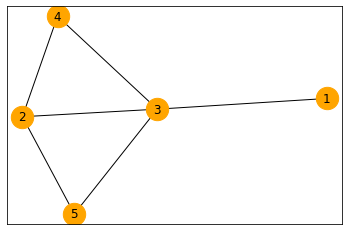

In [3]:
# We will first create a simple directed graph using nx.Graph()
## Creating four nodes
g = nx.Graph() #Create a network object
g.add_node(1) #Add one node
g.add_nodes_from([2, 3, 4, 5]) #Add multiple nodes.

## Creading edges between nodes
g.add_edges_from([(1,3), 
                  (2,3),
                  (2,4),
                  (2,5),
                  (3,4),
                  (3,5)])

## We can now visualise the sample network
nx.draw_networkx(g, node_color='orange', node_size=500)

In [4]:
# We can list all the nodes and edges in the network
print("Nodes of graph: ")
print(g.nodes())
print("\nEdges of graph: ")
print(g.edges())
# We can also calculate the shortest path between any pair of nodes
print("\nShortest path between 4 and 5:")
p = nx.shortest_path_length(g, source=5, target=4)
print(p)

Nodes of graph: 
[1, 2, 3, 4, 5]

Edges of graph: 
[(1, 3), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5)]

Shortest path between 4 and 5:
2


### 2.3 Importing real-world SNA dataset 

We can **import** real-world social network dataset from csv files. There are mainly **two** types of data supported by networkX

- **adjacency matrix** is a matrix with rows and columns at plot by nodes, where element Aij shows the number of links going from node i to node j

- **edge list** another common format of dataset is edge list, which consists of a list of pairs of nodes

You can create your own adjacency list or edge list in a regular spreadsheet and then import into python via networkx 

![adjacency matrix](img/adj.png)

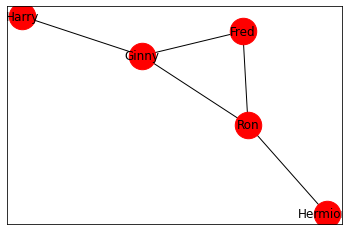

In [5]:
# Data type 1
# In this example, the adjacency list says that Harry is married with Ginny; Ron is married with Hermione etc
g = nx.read_adjlist('data/harry_family_adjlist.csv', delimiter = ',')
nx.draw_networkx(g, node_color='red', node_size=700)

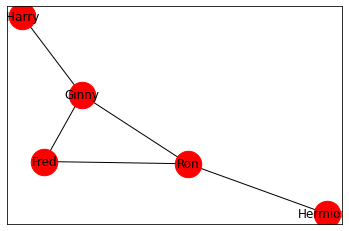

In [6]:
# Data type 2
# We can also read from an edge list
# In this example, the edge list contains pairs of nodes, for example Harry with Ginny (married), Ginny with Ron (siblings)
g = nx.read_edgelist('data/harry_family_edgelist.csv', delimiter = ',')
nx.draw_networkx(g, node_color='red', node_size=700)

### 2.4 Importing large-scale social network data

For this course, we will be analysing the network of **the corporate interlocks in Scotland** in the beginning of the twentieth century (1904-5). In the nineteenth century, joint stock companies were established to raise capital for heavy industry and textile industry.

Joint stock companies are owned by the shareholders, who are represented by a board of directors. This opens up the possibility of interlocking directorates. By the end of the nineteenth century, joint stock companies had become the predominant form of business enterprise at the expense of private family businesses. Families, however, still exercised control through ownership and directorships.

The data are taken from the book The Anatomy of Scottish Capital by John Scott and Michael Hughes. The nodes are the directors of the largest joint stock companies in Scotland in 1904-5. The edges represent co-directorates (ie. if they are shareholders of the same company)

In [7]:
# We have a header for the edgelist from "source" node to "target" node 
# We use pandas read_csv function to first import the edgelist data in to a dataframe
# and then convert the dataframe of edgelist into a graph
df = pd.read_csv("data/scotland_edgelist.csv", sep=',')
g = nx.from_pandas_edgelist(df, source='source', target='target')

# We can first have an overview of the network
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 134
Number of edges: 659
Average degree:   9.8358


In [13]:
# Let's see the network density
nx.density(g)

0.0739535405678375

In [14]:
# How network density is calculated?
2*659/(134*(134-1))

0.0739535405678375

In [58]:
# Let's check out who are included in the network
g.nodes()

NodeView(('carlow, c.', 'gilroy, a.(b.)', 'grierson, h.', 'mccosh, a.k.', 'macpherson, h.s.', 'simpson, a.', 'younger, h.g.', 'mungall, h.', 'aitken, t.', 'jordan, j.', 'duke of buccleuch and queensberry', 'earl of elgin and kincardine', 'dundas, ralph', 'wright, j.p.', 'carmichael, sir t.d.g.', 'haldane, j.', 'cook, sir h.', 'maconochie, c.c.', 'cox, e.', 'dalgleish, sir w.o.', 'don, r.b.', 'lord balfour of burleigh', 'smith, j.p.', 'king, sir j.', 'brown, h.', 'arthur, sir m.', 'mason, t.', 'davidson, w.s.', 'black, a.d.m.', 'thompson, sir j.', 'mitchell-thompson, sir m.', 'tod, d.', 'marquess of breadalbane', 'renshaw, sir c.b.', 'houldsworth, j.h.', 'lord newlands', 'allan, h.', 'vernon, g.r.', 'younger, w.', 'donaldson, w.a.', 'mclaren, w.s.b.', 'glen-coats, sir t.', 'arrol, sir w.', 'clark, s.', 'tennant, sir c.', 'alexander, t.', 'couper, j.', 'innes, j.', 'denny, j.m.', 'hood, j.a.', 'stewart, r.k.', 'bell, sir j.', 'sanderson, w.', 'anstruther, sir r.w.', 'davidson, j.h.', 'ma

## 3. Visualising networks

### 3.1 Option 1: the NetworkX method

NetworkX is not primarily a graph drawing package but it provides basic drawing capabilities by using matplotlib. 

circular_layout(): Position nodes on a circle.

random_layout(): Position nodes uniformly at random in the unit square.

rescale_layout(): Return scaled position array to (-scale, scale) in all axes.

shell_layout(): Position nodes in concentric circles.

spring_layout(): Position nodes using Fruchterman-Reingold force-directed algorithm.
    
    - Their purpose is to position the nodes of a graph in two-dimensional or three-dimensional space so that all the edges are of more or less equal length and there are as few crossing edges as possible

spectral_layout(): Position nodes using the eigenvectors of the graph Laplacian.

kamada_kawai_layout(): Position nodes using Kamada-Kawai path-length cost-function.

*Note: For more complex network visualisation, use professional network visualisation tools such as Gephi*

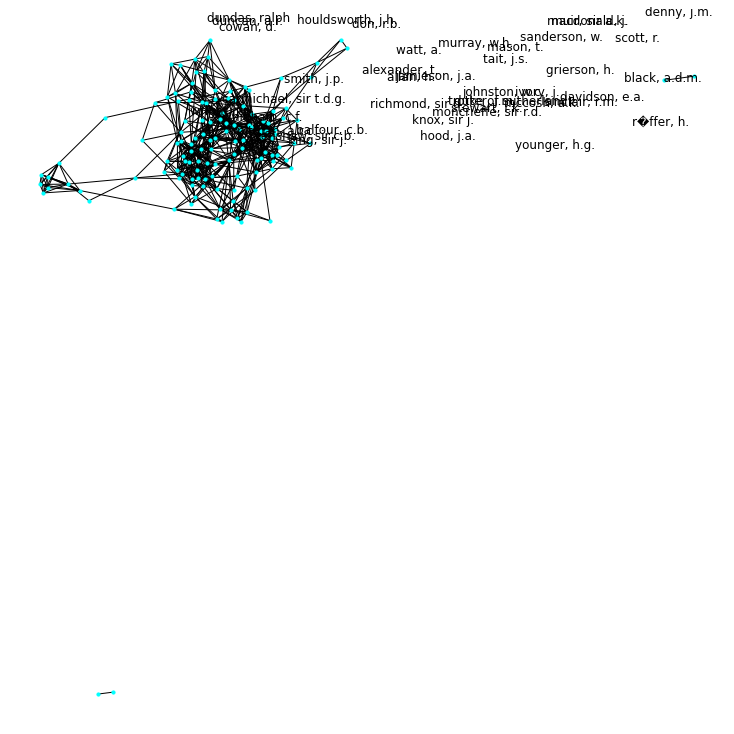

<Figure size 432x288 with 0 Axes>

In [59]:
# random layout
plt.figure(figsize=(10,10))
pos = nx.random_layout(g)
nx.draw(g, node_size = 10, node_color='cyan', with_labels=False) 
nx.draw_networkx_labels(g, pos)
plt.show()

# use this line to save a copy of your network visualisation
plt.savefig('result/networkx_random.png')

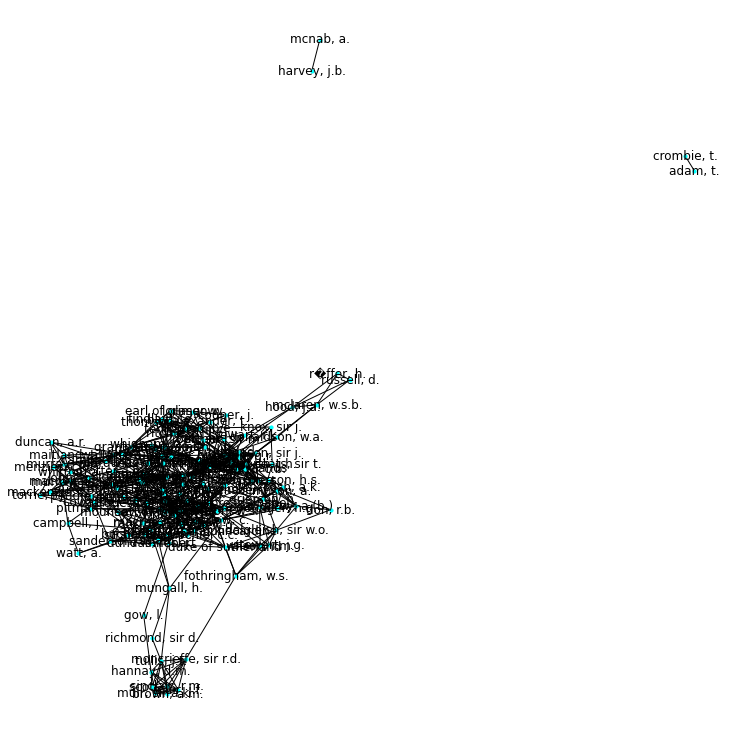

<Figure size 432x288 with 0 Axes>

In [60]:
# random layout
plt.figure(figsize=(10,10))
pos = nx.random_layout(g)
nx.draw(g, node_size = 10, node_color='cyan', with_labels=True) 
#nx.draw_networkx_labels(g, pos)
plt.show()

# use this line to save a copy of your network visualisation
plt.savefig('result/networkx_random.png')

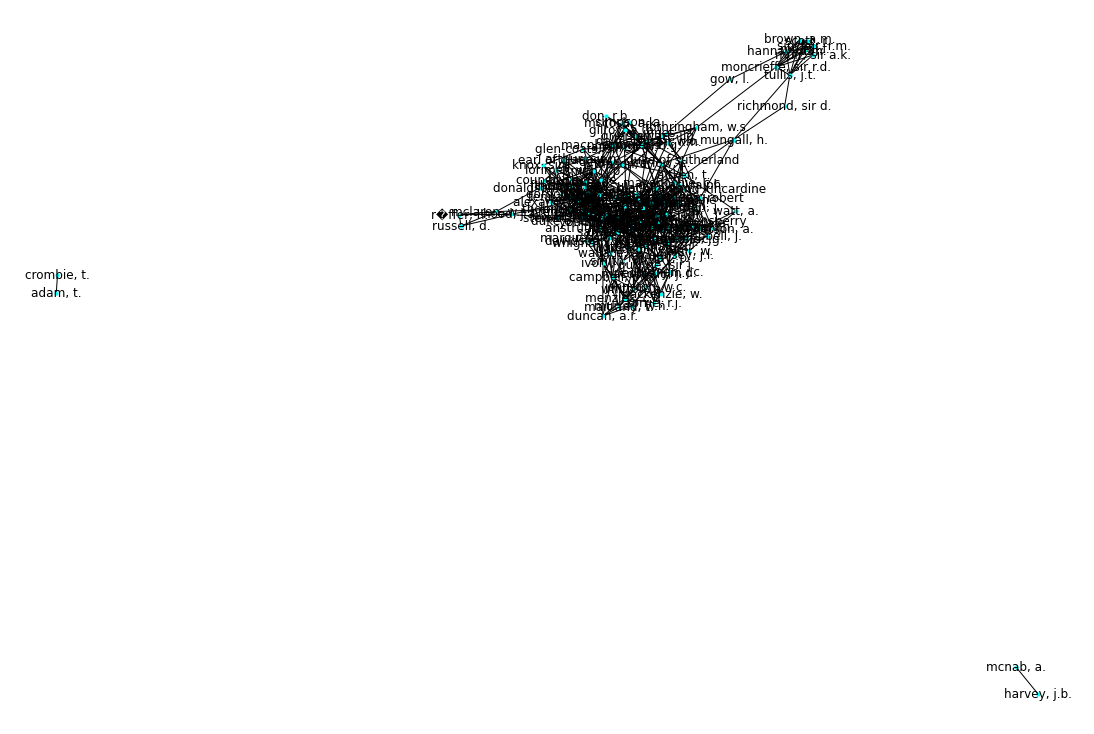

<Figure size 432x288 with 0 Axes>

In [61]:
# spring layout
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(g)
nx.draw(g, node_size = 10, node_color='cyan', with_labels=True)
plt.show()

# use this line to save a copy of your network visualisation
plt.savefig('result/networkx_spring.png')

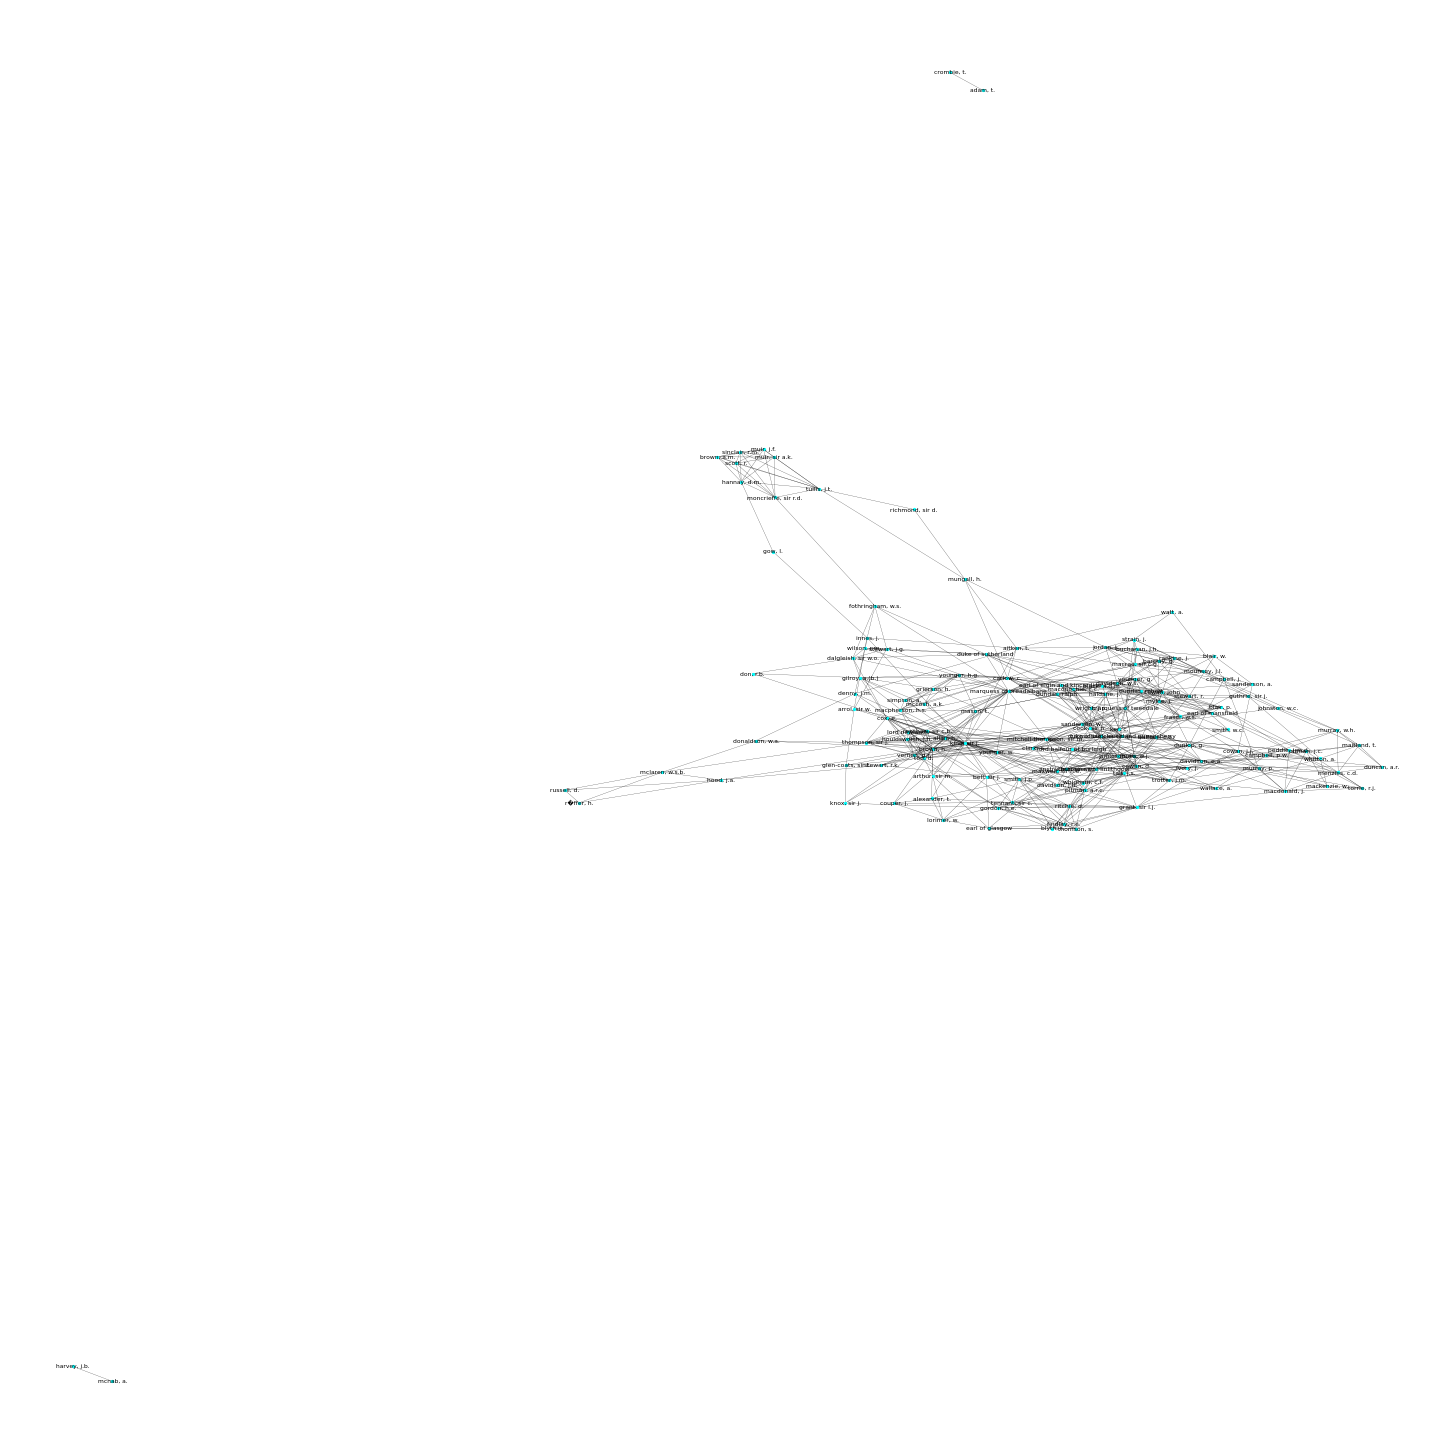

<Figure size 432x288 with 0 Axes>

In [63]:
# random layout
plt.figure(figsize=(20,20))
pos = nx.kamada_kawai_layout(g)
nx.draw(g, 
        node_size = 5, # Let's try using smaller nodes
        node_color='cyan', 
        with_labels=True,
       width = 0.2, # We want to use narrower edges in the visualisation,
        font_size = 6 # Let's also assign a smaller font size value here
       ) 
plt.show()

# use this line to save a copy of your network visualisation
plt.savefig('result/networkx_kamada.png')

### 3.2 Option 2: ploting interactive networks using pyvis

The pyvis library is meant for quick generation of visual network graphs with minimal python code. It is designed as a wrapper around the popular Javascript visJS library found at this link: https://visjs.github.io/vis-network/examples/ 

The best part about pyvis is its interactive features: You can zoom, select, hover nodes in your visualisaion. 


In [15]:
net = Network(notebook=True)
# load the networkx graph
net.from_nx(g)
# use the line below to personalise the output in your browser
## Refer to pyvis documentation here: https://pyvis.readthedocs.io/en/latest/_modules/pyvis/network.html
#net.show_buttons(True)
net.toggle_hide_edges_on_drag(True)
net.show("result/pyvis_director.html")

## 4. Measuring networks: Centrality

A social network can contain millions of users. Some of these users are more active or more powerful than other users.

How to measure the structural importance of nodes in the network? 

- **Degree centrality**: the number of connections (edges) to other users as the measure of importance

- **Betweenness centrality** describes how important a user is as a link between different network segments

    - Identifying bridges/brokerages
    
    - "Structural holes": An individual who acts as a mediator between two or more closely connected groups of people could gain important comparative advantages. 

- **Eigenvector centrality** measurement describes the centrality of a person with regard to the global structure of the network. 
    
    - It assigns relative scores to all nodes in the network based on the concept that connections to nodes with high scoring contribute more to the score of the node in question than connections to nodes with low scoring.
    
- **PageRank**, which is a variant of the eigenvector centrality measure

    - According to PageRank algorithm, the importance of a page is determined by the importance of the pages that it is linked to. A page is assigned a high rank if the sum of the ranks of its back- links is high. Otherwise, it is assigned a low rank.
    
    - PageRank algorithm gives nontrivial results only for asymmetric networks. If links are symmetric (undirected), the PageRank values will be the same as node degrees.
    
    - PageRank was proposed to index Web pages. However, it can also be applied to calculate centrality for directed graphs in social networks.

### 4.1 Degree centrality

In [19]:
# An important measure of a node in a graph is degree which
# For undirected graphs, is the number of connections the node has.
# To see the node degrees in the network
g.degree()

DegreeView({'carlow, c.': 17, 'gilroy, a.(b.)': 9, 'grierson, h.': 7, 'mccosh, a.k.': 7, 'macpherson, h.s.': 10, 'simpson, a.': 7, 'younger, h.g.': 9, 'mungall, h.': 5, 'aitken, t.': 8, 'jordan, j.': 13, 'duke of buccleuch and queensberry': 20, 'earl of elgin and kincardine': 11, 'dundas, ralph': 11, 'wright, j.p.': 11, 'carmichael, sir t.d.g.': 20, 'haldane, j.': 11, 'cook, sir h.': 17, 'maconochie, c.c.': 11, 'cox, e.': 15, 'dalgleish, sir w.o.': 8, 'don, r.b.': 3, 'lord balfour of burleigh': 8, 'smith, j.p.': 13, 'king, sir j.': 35, 'brown, h.': 24, 'arthur, sir m.': 8, 'mason, t.': 7, 'davidson, w.s.': 13, 'black, a.d.m.': 10, 'thompson, sir j.': 14, 'mitchell-thompson, sir m.': 30, 'tod, d.': 14, 'marquess of breadalbane': 27, 'renshaw, sir c.b.': 12, 'houldsworth, j.h.': 12, 'lord newlands': 12, 'allan, h.': 15, 'vernon, g.r.': 14, 'younger, w.': 19, 'donaldson, w.a.': 4, 'mclaren, w.s.b.': 5, 'glen-coats, sir t.': 4, 'arrol, sir w.': 5, 'clark, s.': 13, 'tennant, sir c.': 15, 'a

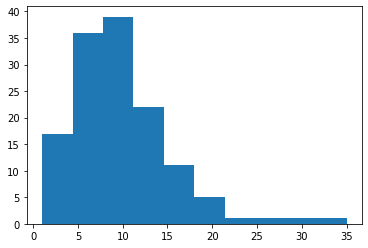

In [20]:
# Sometimes we want to plot a histgram of node degrees
# We create a function for this purpose
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(g)

In [21]:
# But we want to know which codes have the highest node degree
degree_sorted = sorted(g.degree, key=lambda x: x[1], reverse=True)
# We show the top 10 highest ranked nodes, measured by degree centrality
top_10_degree = degree_sorted[:10]
top_10_degree = pd.DataFrame(top_10_degree,columns=['node','degree centrality'])
top_10_degree

,node,degree centrality
0,"king, sir j.",35
1,"mitchell-thompson, sir m.",30
2,marquess of breadalbane,27
3,"brown, h.",24
4,duke of buccleuch and queensberry,20
5,"carmichael, sir t.d.g.",20
6,"pitman, a.r.c.",20
7,"younger, w.",19
8,"tait, j.s.",18
9,"carlow, c.",17


### 4.2 Betweenness centrality

In [22]:
# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(g)
bet_sorted = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
top_10_bet = bet_sorted[:10]
top_10_bet = pd.DataFrame(top_10_bet,columns=['node','betweenness centrality'])
top_10_bet

,node,betweenness centrality
0,"king, sir j.",0.173864
1,marquess of breadalbane,0.128212
2,"mitchell-thompson, sir m.",0.081107
3,"carlow, c.",0.063304
4,"mungall, h.",0.059014
5,duke of buccleuch and queensberry,0.053757
6,"fothringham, w.s.",0.051650
7,"moncrieffe, sir r.d.",0.040443
8,"brown, h.",0.039114
9,"jordan, j.",0.037603


### 4.3 Eigenvector centrality

In [23]:
# Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(g)
eig_sorted = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
top_10_eig = eig_sorted[:10]
top_10_eig = pd.DataFrame(top_10_eig,columns=['node','eigenvector centrality'])
top_10_eig

,node,eigenvector centrality
0,"mitchell-thompson, sir m.",0.297339
1,"king, sir j.",0.282836
2,"younger, w.",0.224756
3,"brown, h.",0.222679
4,marquess of breadalbane,0.213066
5,"allan, h.",0.183891
6,"tod, d.",0.176032
7,"vernon, g.r.",0.176032
8,"cox, e.",0.175012
9,"thompson, sir j.",0.172640


In [24]:
# Some nodes might be considered as "central" using one measurement
# But is not central using another measurement
# Some nodes, however, are central, when measured in all three measurements!

top_10 = pd.merge(top_10_degree, top_10_bet, on = ['node'], how = "outer")
top_10 = pd.merge(top_10, top_10_eig, on = ['node'], how = "outer")
top_10

,node,degree centrality,betweenness centrality,eigenvector centrality
0,"king, sir j.",35.0,0.173864,0.282836
1,"mitchell-thompson, sir m.",30.0,0.081107,0.297339
2,marquess of breadalbane,27.0,0.128212,0.213066
3,"brown, h.",24.0,0.039114,0.222679
4,duke of buccleuch and queensberry,20.0,0.053757,NaN
5,"carmichael, sir t.d.g.",20.0,NaN,NaN
6,"pitman, a.r.c.",20.0,NaN,NaN
7,"younger, w.",19.0,NaN,0.224756
8,"tait, j.s.",18.0,NaN,NaN
9,"carlow, c.",17.0,0.063304,NaN


## 5. Community detection

- The task of community detection is to discover subsets of nodes of connected communities in which nodes have many internal edges and few external edges. 

- Alternative names for sub-communities: clustering, sub-groups

- K-cliques, modularity optimization, and link communities are some of the popular methods in the stream of community detection

- We won't go into details on the calculation/algorithms behind community detection

- We will introduce the use of modularity optimization in networkx and cliques in this course

### 5.1 Connected components 

You might noticed that some nodes are not connected with the core of the network in the visualisation. 

We will use networkx to generate the largest connected component of the network.

In [25]:
# Let's extract a subgraph of the largest connected component of the network
g_connected = sorted(nx.connected_components(g), key=len, reverse=True)
g_1 = g.subgraph(g_connected[0])

In [26]:
# Let's visualise the subgraph and see how it is different from the visualisation of the whole network
net = Network(notebook=True)
# load the networkx graph
net.from_nx(g_1)
net.show("result/pyvis_director_largest_component.html")

### 5.2 Modularity

**Modularity optimatisation** is often used in optimization methods for detecting community structure in networks.

- Modularity is the fraction of the edges that fall within the given groups minus the expected fraction if edges were distributed at random. The value of the modularity for unweighted and undirected graphs lies in the range [-1/2, 1]

- It is positive if the number of edges within groups exceeds the number expected on the basis of chance. 

In [27]:
import networkx.algorithms.community as nxcom

# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(g), key=len, reverse=True)

# Count the communities
print(f"The corporate interlocks network in Scotland has {len(communities)} communities.")


The corporate interlocks network in Scotland has 8 communities.


In [28]:
# The output of the community detection consists of sets of vertex numbers (set of sets)
communities

[frozenset({'alexander, t.',
            'anstruther, sir r.w.',
            'blyth, r.',
            'couper, j.',
            'cowan, j.j.',
            'davidson, j.h.',
            'duke of buccleuch and queensberry',
            'dunlop, g.',
            'earl of glasgow',
            'findlay, r.e.',
            'gordon, h.e.',
            'grant, sir l.j.',
            'ivory, j.',
            'jamieson, j.a.',
            'lord balfour of burleigh',
            'lorimer, w.',
            'macdonald, j.',
            'marquess of linlithgow',
            'mure, w.j.',
            'murray, p.',
            'pitman, a.r.c.',
            'ritchie, d.',
            'smith, j.p.',
            'tait, j.s.',
            'tennant, sir c.',
            'thomson, s.',
            'trotter, j.m.',
            'whigham, c.f.'}),
 frozenset({'allan, h.',
            'arthur, sir m.',
            'bell, sir j.',
            'brown, h.',
            'cox, e.',
            'denny, j.m.',
      

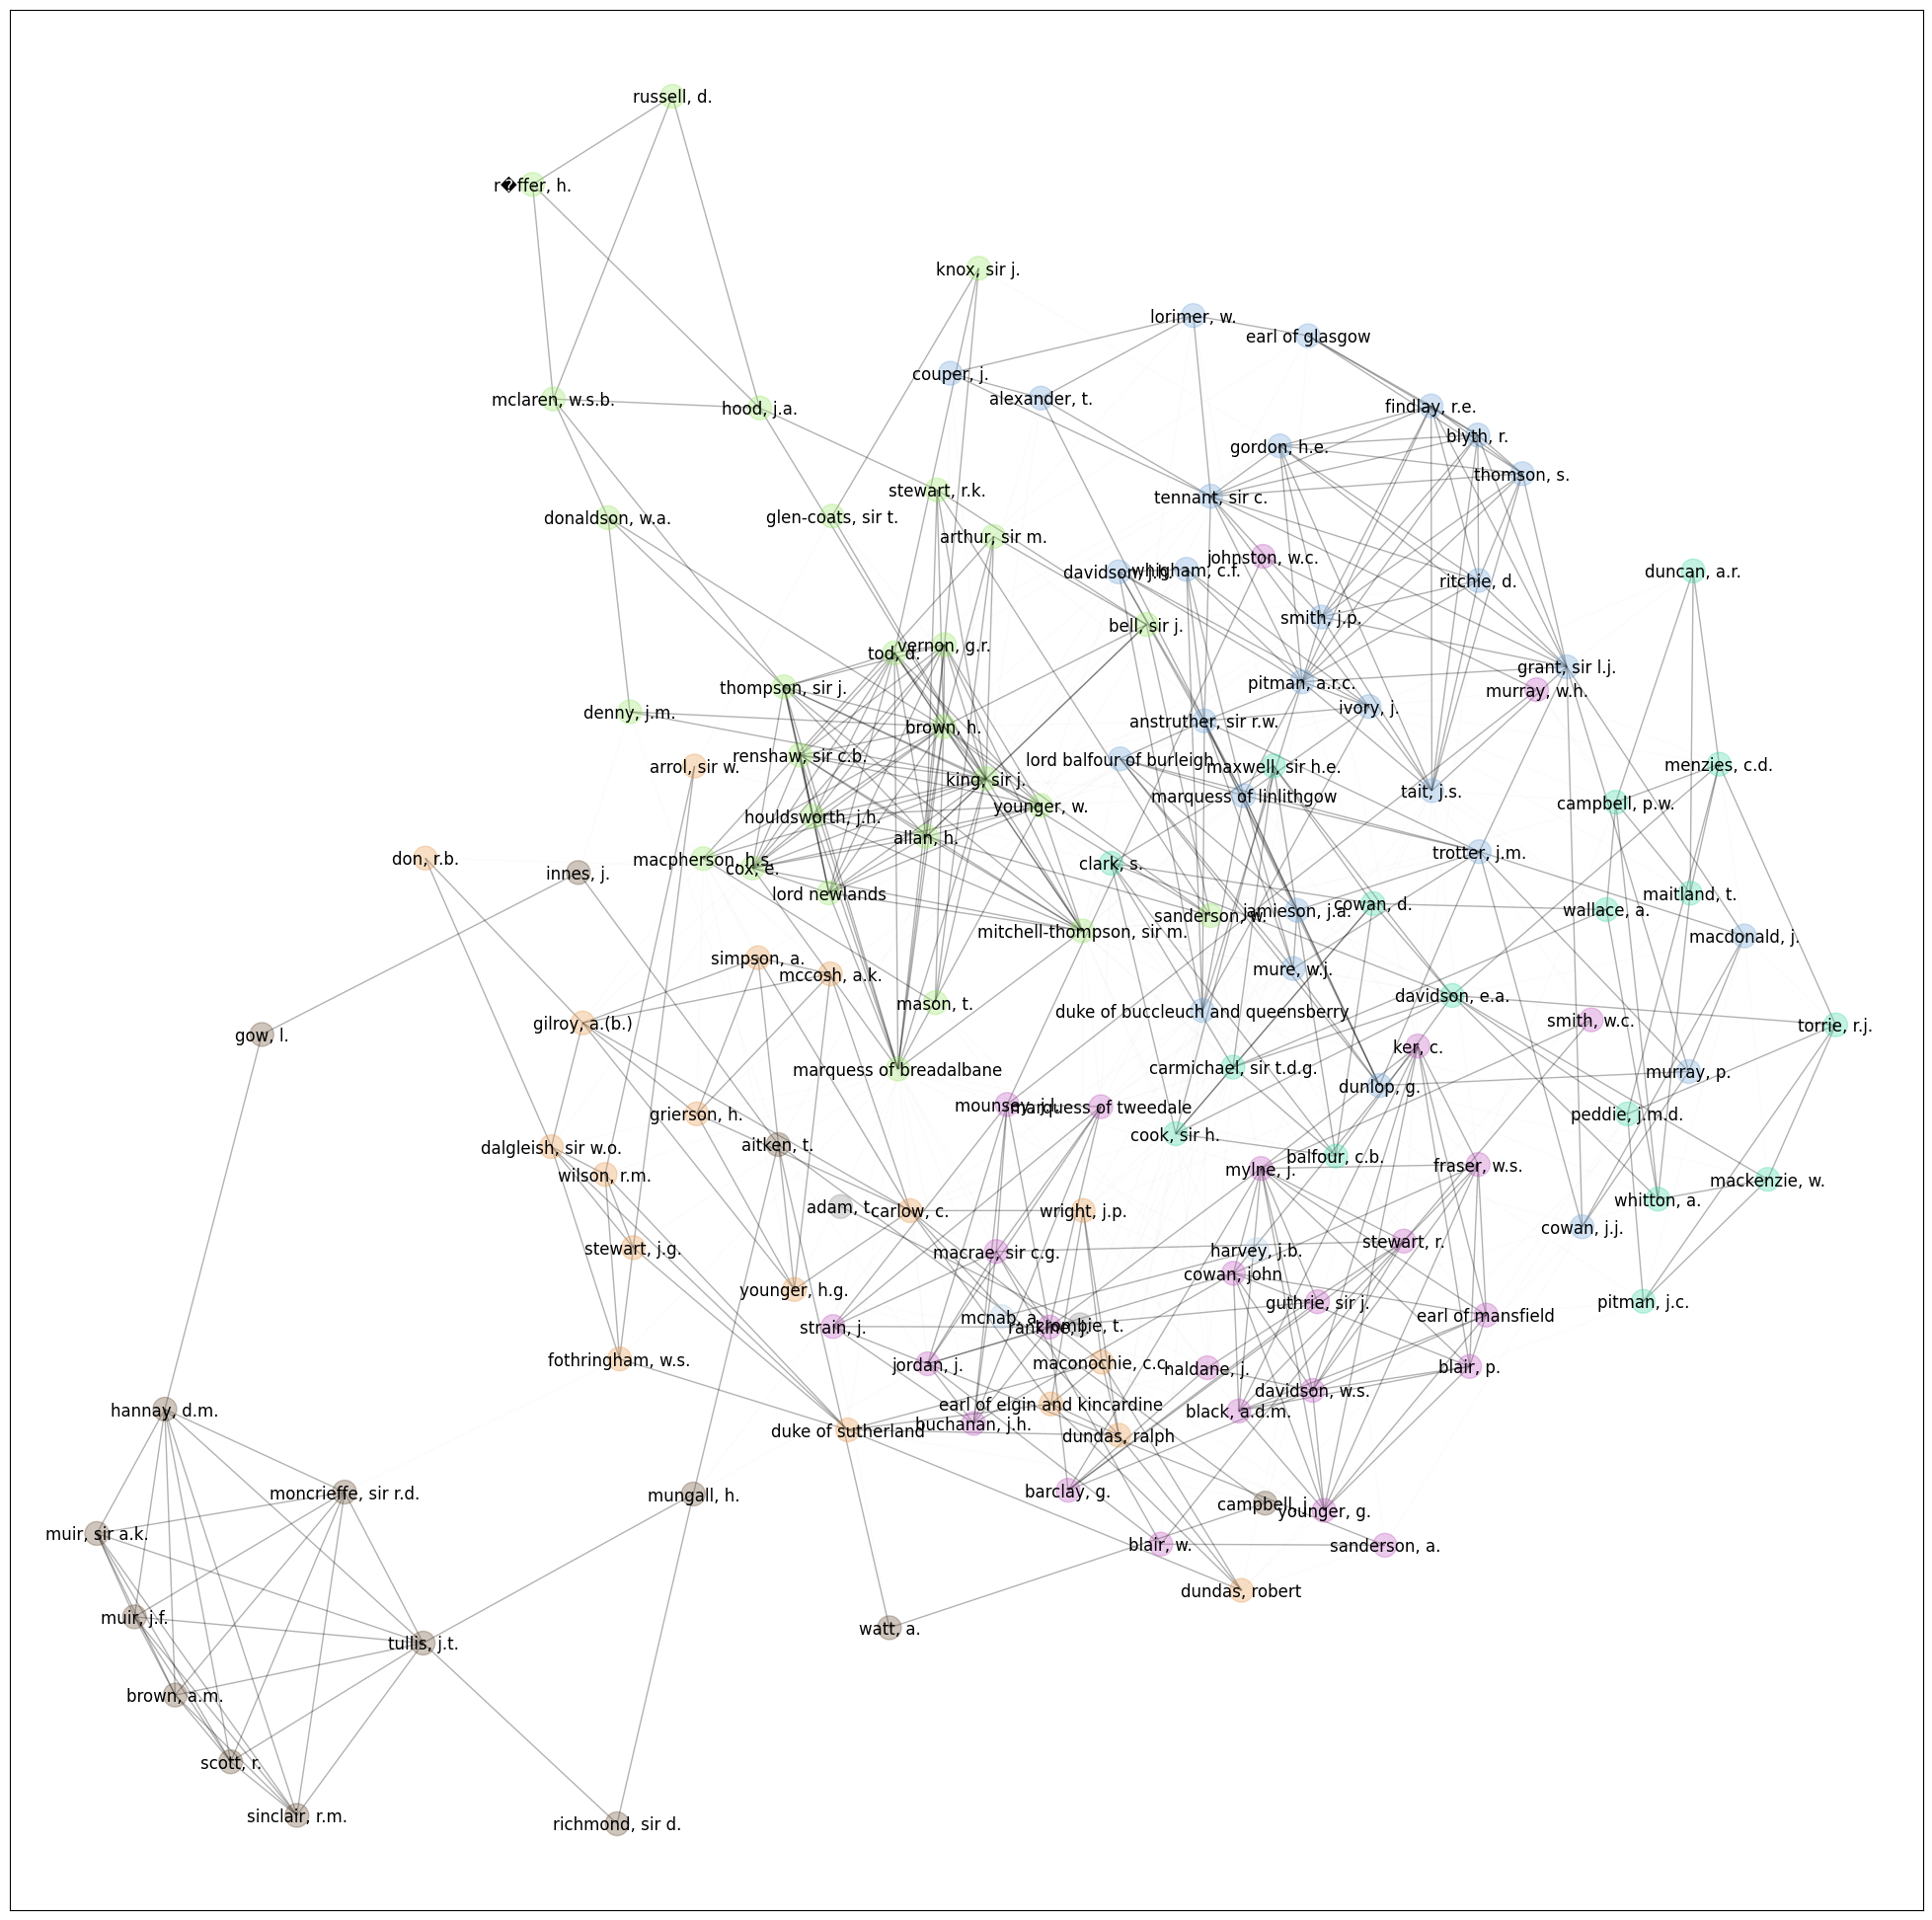

In [29]:
# If we wish to visualize this we need to define a few utilities. 
# The methods simply assign the community number to the nodes and edges

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (25, 25)})
#plt.style.use('dark_background')

def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)       

# Set node and edge communities
set_node_community(g, communities)
set_edge_community(g)


# Set community color for internal edges
external = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]

# external edges
nx.draw_networkx(
    g, 
    pos=pos, 
    node_size=0, 
    edgelist=external, 
    edge_color="silver",
    node_color=node_color,
    alpha=0.05, 
    with_labels=False)

# internal edges
nx.draw_networkx(
    g, 
    pos=pos,
    edgelist=internal, 
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.3, # Making internal edges less transparent than external edges
    with_labels=False)

nx.draw_networkx_labels(g, pos, verticalalignment = 'center_baseline')

# Save the visualisation in result folder
plt.savefig('result/community.png')


### 5.3 Cliques

We can also study clique, which is a subset of nodes where every part of node in the clique is connected

Let’s look at the largest clique in the corporate interlocks network

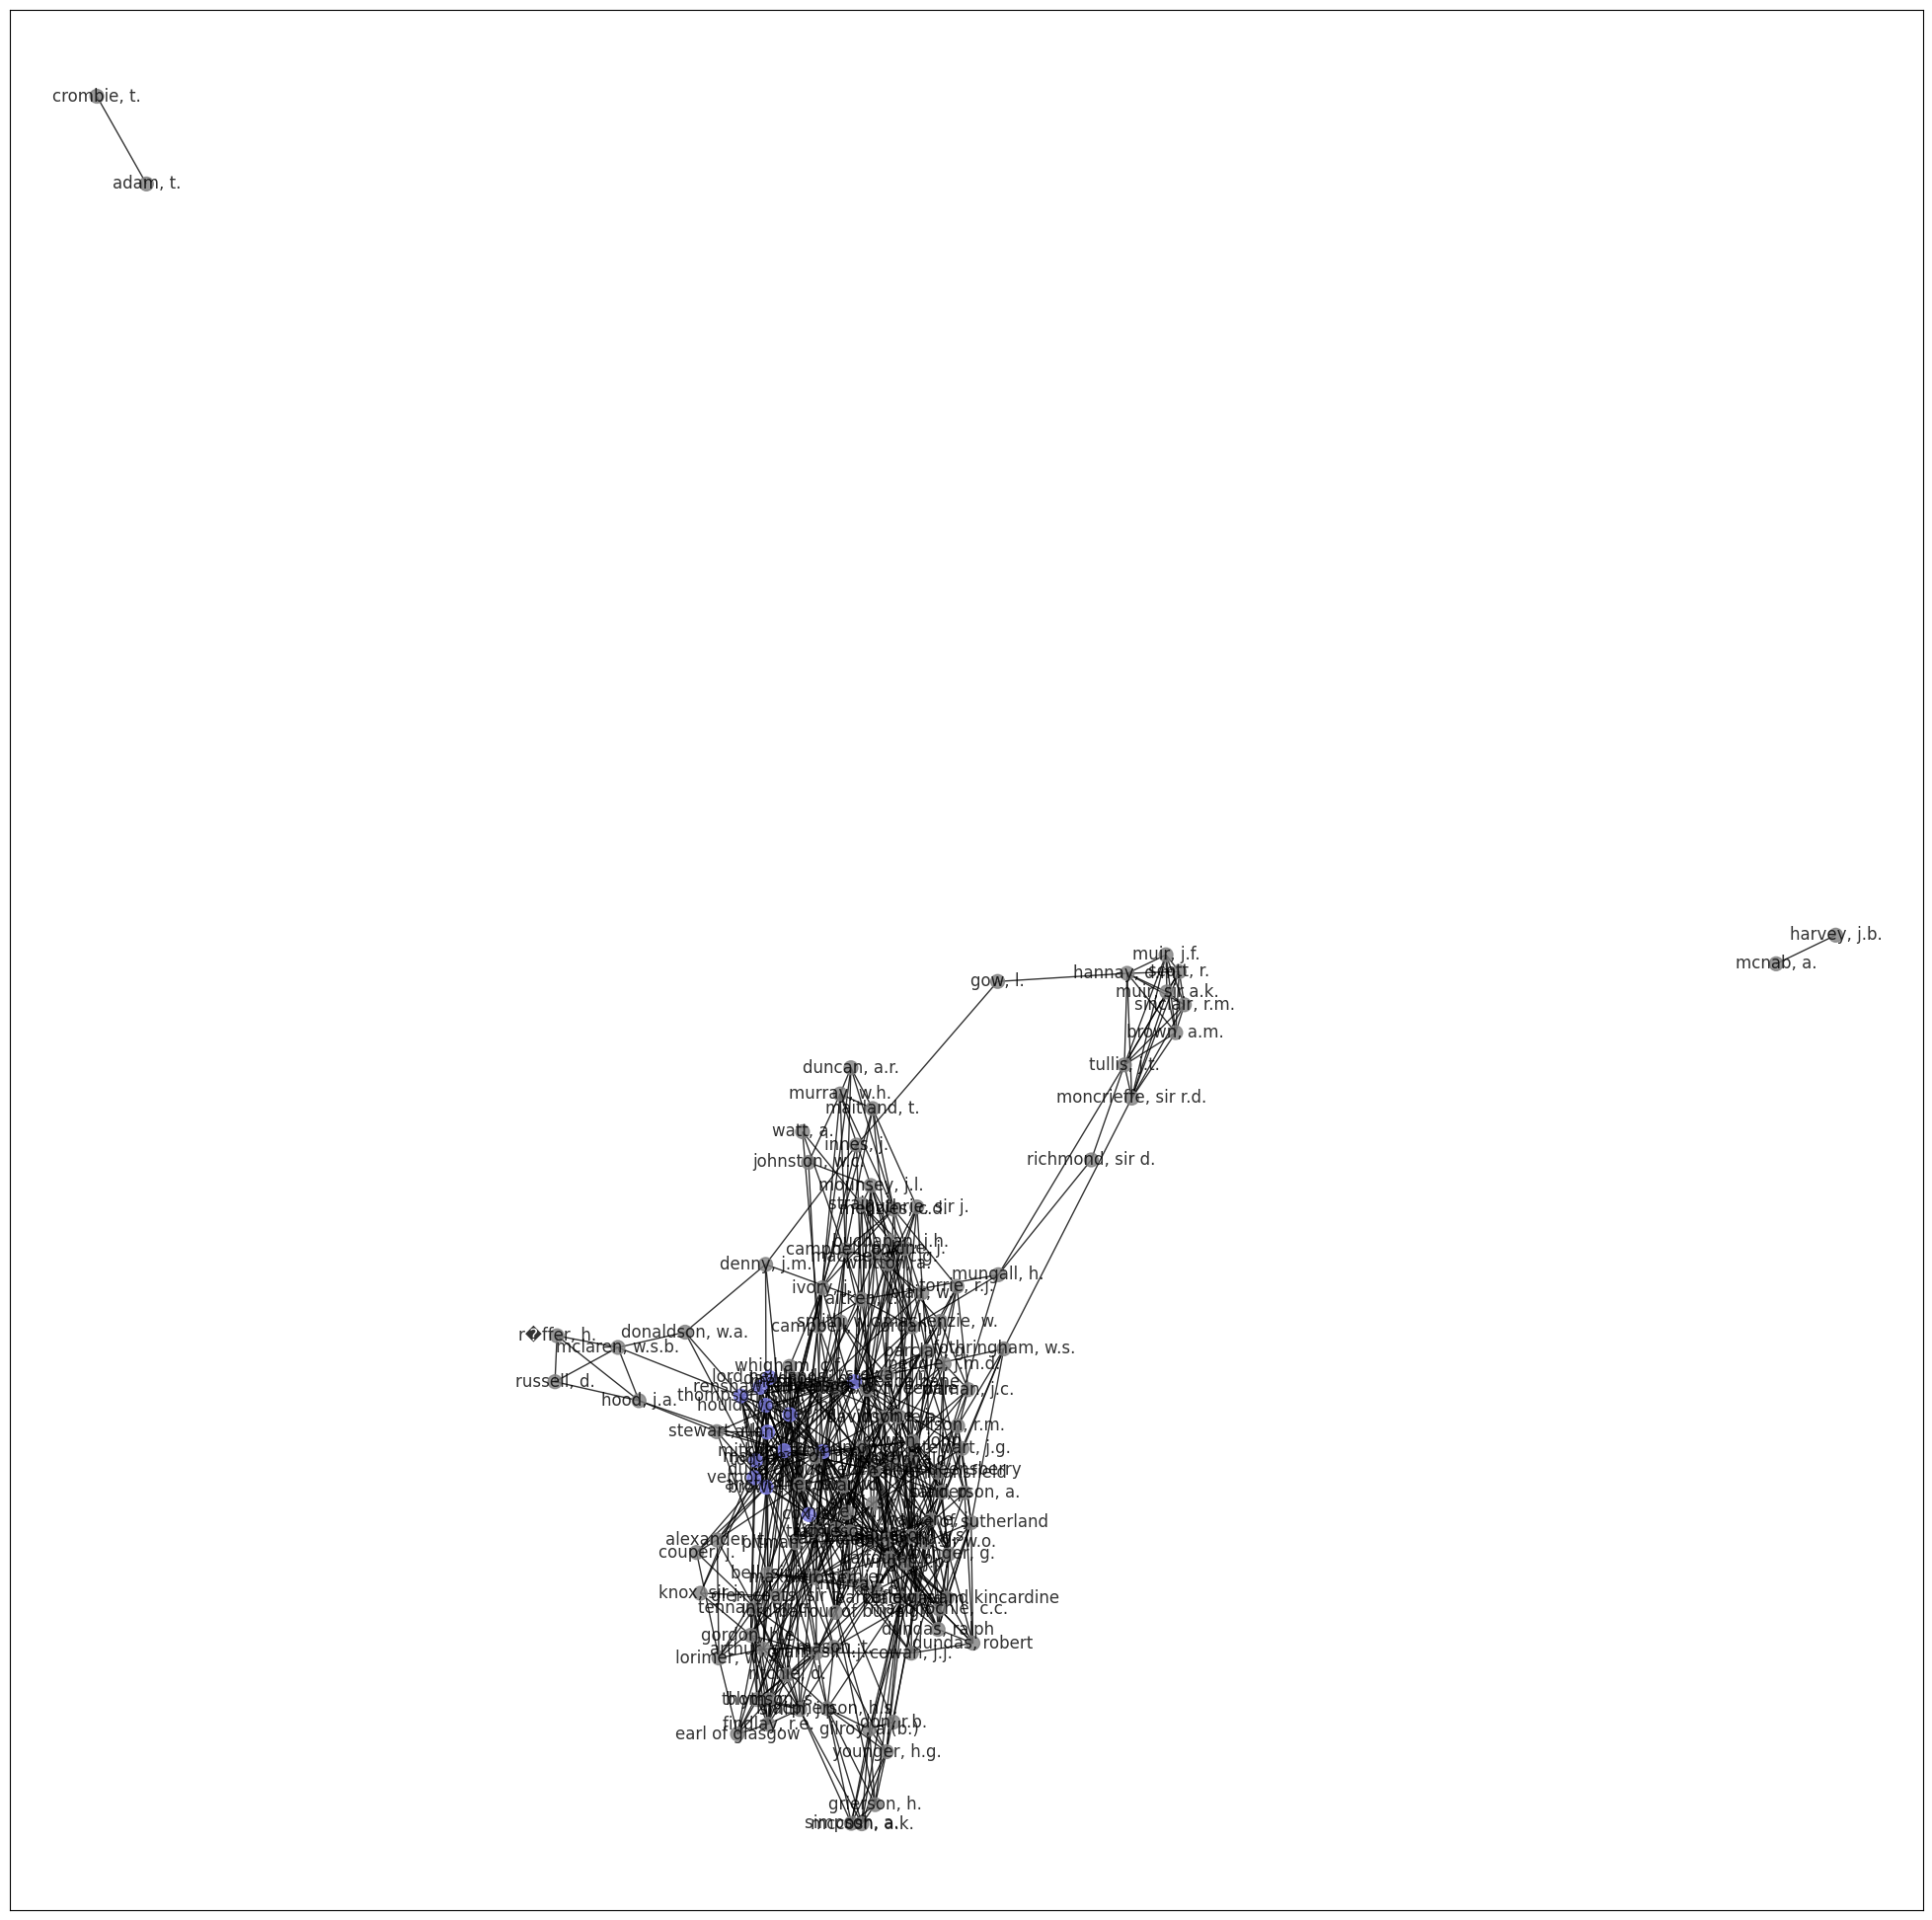

In [30]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (25, 25)})

pos = nx.spring_layout(g)

# identify cliques in the network
cliques = list(nx.find_cliques(g)) 

# finding the largest clique in the network
max_clique = max(cliques, key=len)

# Let's set a different colour for nodes in the clique
node_color = [(0.5, 0.5, 0.5) for v in g.nodes()]
for i, v in enumerate(g.nodes()):
    if v in max_clique:
        node_color[i] = (0.5, 0.5, 0.9)

nx.draw_networkx(g,node_size = 100, node_color=node_color, pos=pos, alpha = 0.8)

plt.savefig('result/visualising_clique.png')

## Conclusion

- Graph theory as the "language" of network science

- Structural perspective of the world

- Python as a tool to construct, visualise, and analyse social networks 

![Network society](img/network.png)